In [2]:
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
from optimized_orderbook import OptimizedOrderBook

# Set random seed for reproducibility
random.seed(42)


## Benchmark Functions


In [3]:
def benchmark_insert(num_operations):
    """
    Benchmark insert operations.
    
    Args:
        num_operations: Number of insert operations to perform
        
    Returns:
        tuple: (total_time, avg_time_per_op)
    """
    ob = OptimizedOrderBook()
    
    # Generate random orders
    orders = []
    for i in range(num_operations):
        side = random.choice(["bid", "ask"])
        price = round(random.uniform(90.0, 110.0), 2)
        quantity = random.randint(1, 100)
        orders.append({
            "order_id": i,
            "price": price,
            "quantity": quantity,
            "side": side
        })
    
    # Benchmark insertions
    start_time = time.perf_counter()
    for order in orders:
        ob.add_order(order)
    end_time = time.perf_counter()
    
    total_time = end_time - start_time
    avg_time = total_time / num_operations
    
    return total_time, avg_time


In [4]:
def benchmark_amend(num_operations):
    """
    Benchmark amend operations.
    
    Args:
        num_operations: Number of amend operations to perform
        
    Returns:
        tuple: (total_time, avg_time_per_op)
    """
    ob = OptimizedOrderBook()
    
    # First, populate the order book with orders
    num_initial_orders = max(num_operations, 1000)  # Ensure we have enough orders
    order_ids = []
    for i in range(num_initial_orders):
        side = random.choice(["bid", "ask"])
        price = round(random.uniform(90.0, 110.0), 2)
        quantity = random.randint(1, 100)
        order_id = i
        order_ids.append(order_id)
        ob.add_order({
            "order_id": order_id,
            "price": price,
            "quantity": quantity,
            "side": side
        })
    
    # Generate random amend operations
    amend_operations = []
    for _ in range(num_operations):
        order_id = random.choice(order_ids)
        new_quantity = random.randint(1, 100)
        amend_operations.append((order_id, new_quantity))
    
    # Benchmark amendments
    start_time = time.perf_counter()
    for order_id, new_quantity in amend_operations:
        ob.amend_order(order_id, new_quantity)
    end_time = time.perf_counter()
    
    total_time = end_time - start_time
    avg_time = total_time / num_operations
    
    return total_time, avg_time


In [5]:
def benchmark_delete(num_operations):
    """
    Benchmark delete operations.
    
    Args:
        num_operations: Number of delete operations to perform
        
    Returns:
        tuple: (total_time, avg_time_per_op)
    """
    ob = OptimizedOrderBook()
    
    # First, populate the order book with orders
    num_initial_orders = max(num_operations, 1000)  # Ensure we have enough orders
    order_ids = []
    for i in range(num_initial_orders):
        side = random.choice(["bid", "ask"])
        price = round(random.uniform(90.0, 110.0), 2)
        quantity = random.randint(1, 100)
        order_id = i
        order_ids.append(order_id)
        ob.add_order({
            "order_id": order_id,
            "price": price,
            "quantity": quantity,
            "side": side
        })
    
    # Generate random delete operations (shuffle to avoid always deleting from start)
    delete_operations = random.sample(order_ids, min(num_operations, len(order_ids)))
    
    # Benchmark deletions
    start_time = time.perf_counter()
    for order_id in delete_operations:
        ob.delete_order(order_id)
    end_time = time.perf_counter()
    
    total_time = end_time - start_time
    avg_time = total_time / num_operations
    
    return total_time, avg_time


## Run Benchmarks


In [6]:
# Workload sizes to test
workload_sizes = [10, 100, 1000, 10000, 100000, 1000000]

# Storage for results
results = {
    "insert": {"sizes": [], "total_times": [], "avg_times": []},
    "amend": {"sizes": [], "total_times": [], "avg_times": []},
    "delete": {"sizes": [], "total_times": [], "avg_times": []}
}

print("Starting benchmarks...")
print("=" * 80)


Starting benchmarks...


In [7]:
# Benchmark Insert Operations
print("\nBenchmarking INSERT operations:")
print("-" * 80)
for size in workload_sizes:
    print(f"Running {size:,} insertions...", end=" ", flush=True)
    total_time, avg_time = benchmark_insert(size)
    results["insert"]["sizes"].append(size)
    results["insert"]["total_times"].append(total_time)
    results["insert"]["avg_times"].append(avg_time)
    print(f"Total: {total_time:.6f}s, Avg: {avg_time*1000:.6f}ms")
print("Insert benchmarks complete!")



Benchmarking INSERT operations:
--------------------------------------------------------------------------------
Running 10 insertions... Total: 0.000022s, Avg: 0.002210ms
Running 100 insertions... Total: 0.000041s, Avg: 0.000409ms
Running 1,000 insertions... Total: 0.000410s, Avg: 0.000410ms
Running 10,000 insertions... Total: 0.002833s, Avg: 0.000283ms
Running 100,000 insertions... Total: 0.030095s, Avg: 0.000301ms
Running 1,000,000 insertions... Total: 0.236031s, Avg: 0.000236ms
Insert benchmarks complete!


In [8]:
# Benchmark Amend Operations
print("\nBenchmarking AMEND operations:")
print("-" * 80)
for size in workload_sizes:
    print(f"Running {size:,} amendments...", end=" ", flush=True)
    total_time, avg_time = benchmark_amend(size)
    results["amend"]["sizes"].append(size)
    results["amend"]["total_times"].append(total_time)
    results["amend"]["avg_times"].append(avg_time)
    print(f"Total: {total_time:.6f}s, Avg: {avg_time*1000:.6f}ms")
print("Amend benchmarks complete!")



Benchmarking AMEND operations:
--------------------------------------------------------------------------------
Running 10 amendments... Total: 0.000004s, Avg: 0.000420ms
Running 100 amendments... Total: 0.000008s, Avg: 0.000082ms
Running 1,000 amendments... Total: 0.000122s, Avg: 0.000122ms
Running 10,000 amendments... Total: 0.002430s, Avg: 0.000243ms
Running 100,000 amendments... Total: 0.040095s, Avg: 0.000401ms
Running 1,000,000 amendments... Total: 0.743880s, Avg: 0.000744ms
Amend benchmarks complete!


In [9]:
# Benchmark Delete Operations
print("\nBenchmarking DELETE operations:")
print("-" * 80)
for size in workload_sizes:
    print(f"Running {size:,} deletions...", end=" ", flush=True)
    total_time, avg_time = benchmark_delete(size)
    results["delete"]["sizes"].append(size)
    results["delete"]["total_times"].append(total_time)
    results["delete"]["avg_times"].append(avg_time)
    print(f"Total: {total_time:.6f}s, Avg: {avg_time*1000:.6f}ms")
print("Delete benchmarks complete!")
print("\n" + "=" * 80)
print("All benchmarks complete!")



Benchmarking DELETE operations:
--------------------------------------------------------------------------------
Running 10 deletions... Total: 0.000010s, Avg: 0.001050ms
Running 100 deletions... Total: 0.000055s, Avg: 0.000548ms
Running 1,000 deletions... Total: 0.000365s, Avg: 0.000365ms
Running 10,000 deletions... Total: 0.004892s, Avg: 0.000489ms
Running 100,000 deletions... Total: 0.132452s, Avg: 0.001325ms
Running 1,000,000 deletions... Total: 16.739606s, Avg: 0.016740ms
Delete benchmarks complete!

All benchmarks complete!


## Results Summary


In [10]:
# Create DataFrames for each operation type
df_insert = pd.DataFrame({
    "Operations": results["insert"]["sizes"],
    "Total Time (s)": results["insert"]["total_times"],
    "Avg Time per Op (ms)": [t * 1000 for t in results["insert"]["avg_times"]]
})

df_amend = pd.DataFrame({
    "Operations": results["amend"]["sizes"],
    "Total Time (s)": results["amend"]["total_times"],
    "Avg Time per Op (ms)": [t * 1000 for t in results["amend"]["avg_times"]]
})

df_delete = pd.DataFrame({
    "Operations": results["delete"]["sizes"],
    "Total Time (s)": results["delete"]["total_times"],
    "Avg Time per Op (ms)": [t * 1000 for t in results["delete"]["avg_times"]]
})

print("INSERT Operations:")
print(df_insert.to_string(index=False))
print("\n" + "=" * 80)
print("\nAMEND Operations:")
print(df_amend.to_string(index=False))
print("\n" + "=" * 80)
print("\nDELETE Operations:")
print(df_delete.to_string(index=False))


INSERT Operations:
 Operations  Total Time (s)  Avg Time per Op (ms)
         10        0.000022              0.002210
        100        0.000041              0.000409
       1000        0.000410              0.000410
      10000        0.002833              0.000283
     100000        0.030095              0.000301
    1000000        0.236031              0.000236


AMEND Operations:
 Operations  Total Time (s)  Avg Time per Op (ms)
         10        0.000004              0.000420
        100        0.000008              0.000082
       1000        0.000122              0.000122
      10000        0.002430              0.000243
     100000        0.040095              0.000401
    1000000        0.743880              0.000744


DELETE Operations:
 Operations  Total Time (s)  Avg Time per Op (ms)
         10        0.000010              0.001050
        100        0.000055              0.000548
       1000        0.000365              0.000365
      10000        0.004892             

## Visualization: Total Time vs Number of Operations


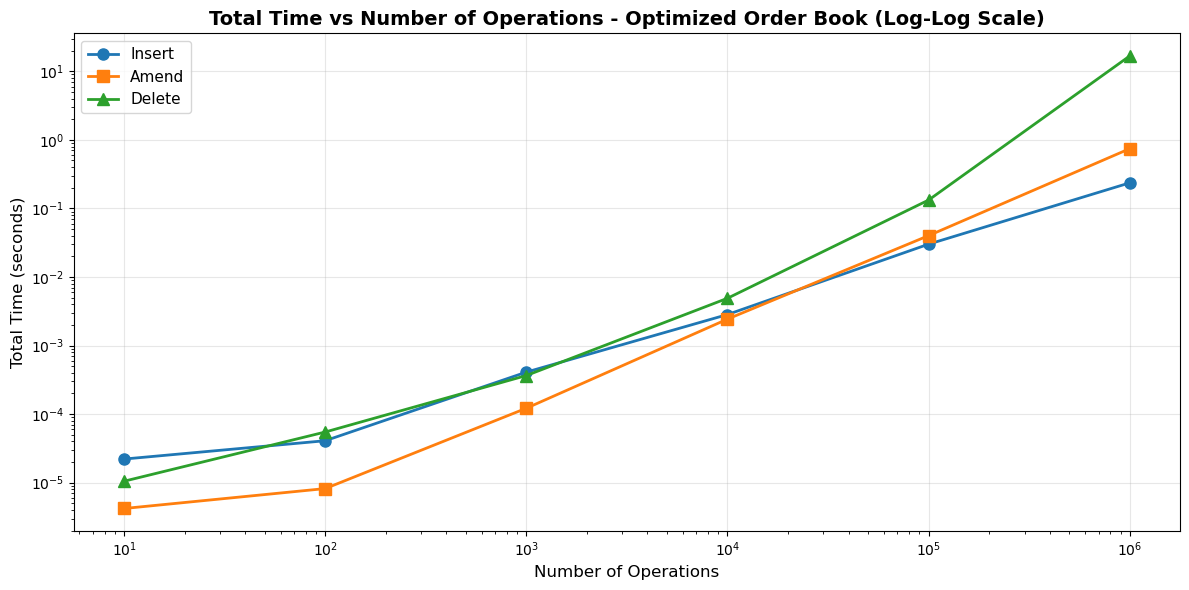

In [13]:
plt.figure(figsize=(12, 6))
plt.loglog(results["insert"]["sizes"], results["insert"]["total_times"], 
           marker='o', label='Insert', linewidth=2, markersize=8)
plt.loglog(results["amend"]["sizes"], results["amend"]["total_times"], 
           marker='s', label='Amend', linewidth=2, markersize=8)
plt.loglog(results["delete"]["sizes"], results["delete"]["total_times"], 
           marker='^', label='Delete', linewidth=2, markersize=8)

plt.xlabel('Number of Operations', fontsize=12)
plt.ylabel('Total Time (seconds)', fontsize=12)
plt.title('Total Time vs Number of Operations - Optimized Order Book (Log-Log Scale)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('optimized_total_time.png', dpi=300, bbox_inches='tight')
plt.show()


## Visualization: Average Time per Operation vs Number of Operations


In [ ]:
plt.figure(figsize=(12, 6))
plt.loglog(results["insert"]["sizes"], [t * 1000 for t in results["insert"]["avg_times"]], 
           marker='o', label='Insert', linewidth=2, markersize=8)
plt.loglog(results["amend"]["sizes"], [t * 1000 for t in results["amend"]["avg_times"]], 
           marker='s', label='Amend', linewidth=2, markersize=8)
plt.loglog(results["delete"]["sizes"], [t * 1000 for t in results["delete"]["avg_times"]], 
           marker='^', label='Delete', linewidth=2, markersize=8)

plt.xlabel('Number of Operations', fontsize=12)
plt.ylabel('Average Time per Operation (milliseconds)', fontsize=12)
plt.title('Average Time per Operation vs Number of Operations - Optimized Order Book (Log-Log Scale)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('optimized_avg_time.png', dpi=300, bbox_inches='tight')
plt.show()


## Scaling Analysis


In [17]:
# Calculate scaling factors (how much slower when operations increase 10x)
def calculate_scaling(results_dict):
    """Calculate how performance scales with workload size."""
    scaling = []
    sizes = results_dict["sizes"]
    total_times = results_dict["total_times"]
    
    for i in range(1, len(sizes)):
        size_ratio = sizes[i] / sizes[i-1]
        time_ratio = total_times[i] / total_times[i-1]
        scaling_factor = time_ratio / size_ratio  # Should be ~1 for linear, >1 for worse
        scaling.append({
            "From": sizes[i-1],
            "To": sizes[i],
            "Size Increase": f"{size_ratio:.1f}x",
            "Time Increase": f"{time_ratio:.2f}x",
            "Scaling Factor": f"{scaling_factor:.2f}x"
        })
    
    return pd.DataFrame(scaling)

print("INSERT Scaling Analysis:")
print(calculate_scaling(results["insert"]))
print("\n" + "=" * 80)
print("\nAMEND Scaling Analysis:")
print(calculate_scaling(results["amend"]))
print("\n" + "=" * 80)
print("\nDELETE Scaling Analysis:")
print(calculate_scaling(results["delete"]))


INSERT Scaling Analysis:
     From       To Size Increase Time Increase Scaling Factor
0      10      100         10.0x         1.85x          0.19x
1     100     1000         10.0x        10.02x          1.00x
2    1000    10000         10.0x         6.91x          0.69x
3   10000   100000         10.0x        10.62x          1.06x
4  100000  1000000         10.0x         7.84x          0.78x


AMEND Scaling Analysis:
     From       To Size Increase Time Increase Scaling Factor
0      10      100         10.0x         1.95x          0.20x
1     100     1000         10.0x        14.85x          1.49x
2    1000    10000         10.0x        19.95x          2.00x
3   10000   100000         10.0x        16.50x          1.65x
4  100000  1000000         10.0x        18.55x          1.86x


DELETE Scaling Analysis:
     From       To Size Increase Time Increase Scaling Factor
0      10      100         10.0x         5.22x          0.52x
1     100     1000         10.0x         6.67x        

In [14]:
# Store optimized results with a different name to avoid conflicts
optimized_results = results.copy()

# Load naïve results
# Copy the results from your naïve benchmark notebook and paste below
# You can find it in the naïve notebook's 'results' variable after running benchmarks

# Naïve results from benchmark_naive_orderbook.ipynb (replace with your actual values if different)
naive_results = {
    "insert": {
        "sizes": [10, 100, 1000, 10000, 100000],
        "total_times": [9.60000033956021e-06, 0.00012710000737570226, 0.00835400000505615, 0.9492446000076598, 235.86095940000087],
        "avg_times": [9.60000033956021e-07, 1.2710000737570227e-06, 8.35400000505615e-06, 9.492446000076598e-05, 0.0023586095940000087]
    },
    "amend": {
        "sizes": [10, 100, 1000, 10000, 100000],
        "total_times": [0.000249, 0.002621, 0.026075, 3.428419, 2206.520497],
        "avg_times": [0.00002489, 0.000026211, 0.000026075, 0.000342842, 0.022065205]
    },
    "delete": {
        "sizes": [10, 100, 1000, 10000, 100000],
        "total_times": [0.000358, 0.002947, 0.015914, 1.847206, 818.670342],
        "avg_times": [0.00003575, 0.000029467, 0.000015914, 0.000184721, 0.008186703]
    }
}

# If you need to update with your actual naïve results, modify the dictionary above
print("Naïve results loaded. Ready for comparison charts!")


Naïve results loaded. Ready for comparison charts!


## Comparison Chart: Total Time


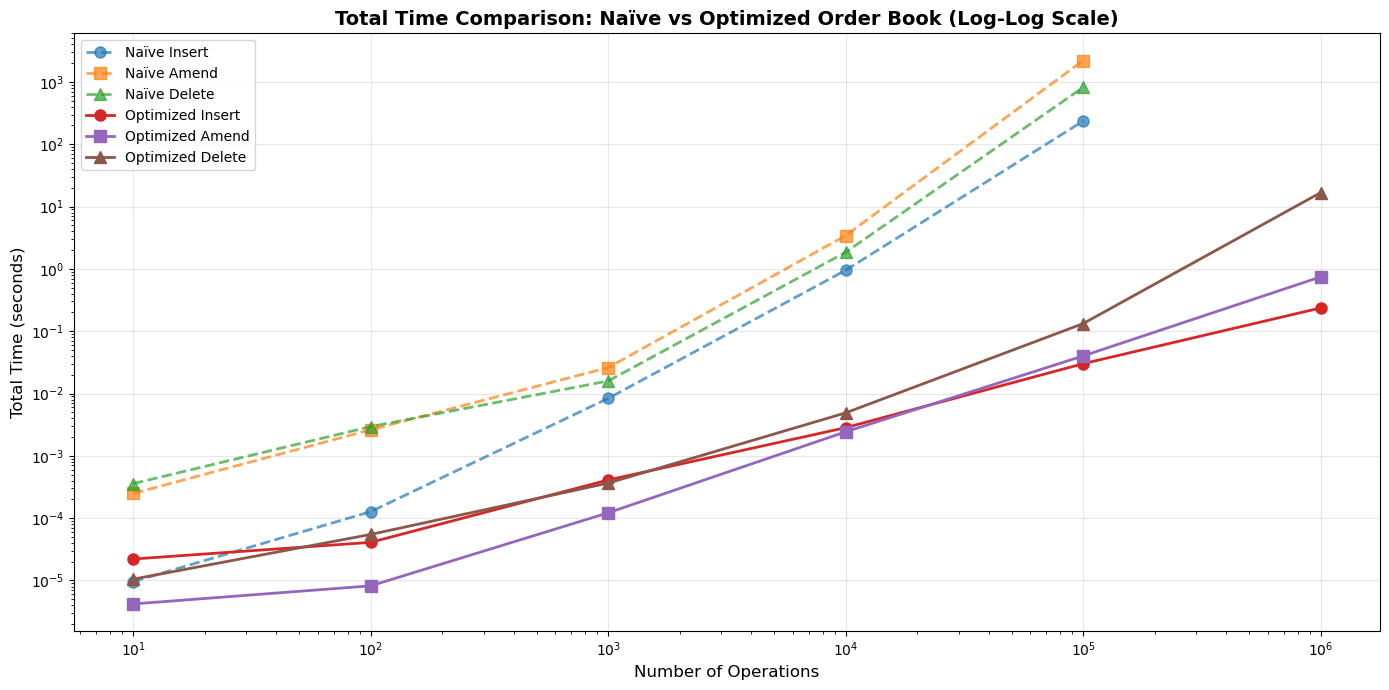

In [15]:
if naive_results is not None:
    plt.figure(figsize=(14, 7))
    
    # Plot naïve results
    plt.loglog(naive_results["insert"]["sizes"], naive_results["insert"]["total_times"], 
               marker='o', label='Naïve Insert', linewidth=2, markersize=8, linestyle='--', alpha=0.7)
    plt.loglog(naive_results["amend"]["sizes"], naive_results["amend"]["total_times"], 
               marker='s', label='Naïve Amend', linewidth=2, markersize=8, linestyle='--', alpha=0.7)
    plt.loglog(naive_results["delete"]["sizes"], naive_results["delete"]["total_times"], 
               marker='^', label='Naïve Delete', linewidth=2, markersize=8, linestyle='--', alpha=0.7)
    
    # Plot optimized results
    plt.loglog(optimized_results["insert"]["sizes"], optimized_results["insert"]["total_times"], 
               marker='o', label='Optimized Insert', linewidth=2, markersize=8, linestyle='-')
    plt.loglog(optimized_results["amend"]["sizes"], optimized_results["amend"]["total_times"], 
               marker='s', label='Optimized Amend', linewidth=2, markersize=8, linestyle='-')
    plt.loglog(optimized_results["delete"]["sizes"], optimized_results["delete"]["total_times"], 
               marker='^', label='Optimized Delete', linewidth=2, markersize=8, linestyle='-')
    
    plt.xlabel('Number of Operations', fontsize=12)
    plt.ylabel('Total Time (seconds)', fontsize=12)
    plt.title('Total Time Comparison: Naïve vs Optimized Order Book (Log-Log Scale)', 
              fontsize=14, fontweight='bold')
    plt.legend(fontsize=10, loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('comparison_total_time.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Naïve results not available. Please provide naive_results dictionary to create comparison chart.")


## Comparison Chart: Average Time per Operation


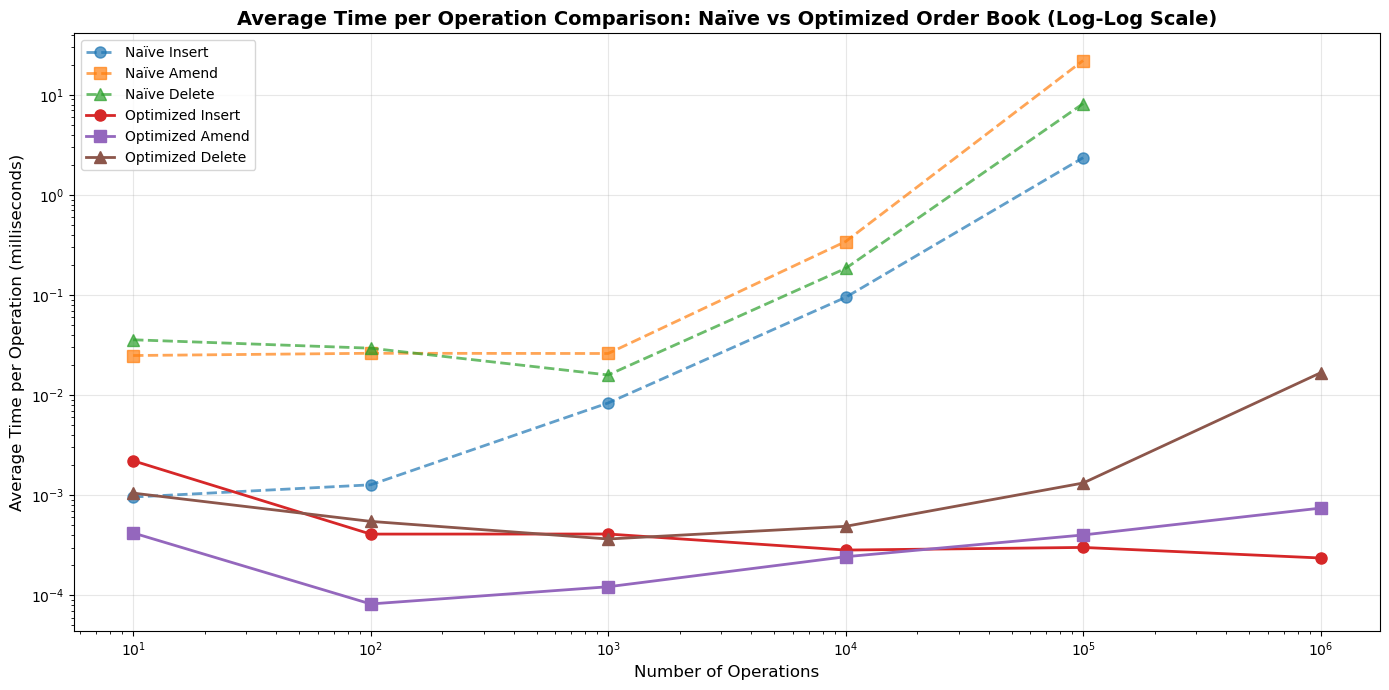

In [16]:
if naive_results is not None:
    plt.figure(figsize=(14, 7))
    
    # Plot naïve results
    plt.loglog(naive_results["insert"]["sizes"], [t * 1000 for t in naive_results["insert"]["avg_times"]], 
               marker='o', label='Naïve Insert', linewidth=2, markersize=8, linestyle='--', alpha=0.7)
    plt.loglog(naive_results["amend"]["sizes"], [t * 1000 for t in naive_results["amend"]["avg_times"]], 
               marker='s', label='Naïve Amend', linewidth=2, markersize=8, linestyle='--', alpha=0.7)
    plt.loglog(naive_results["delete"]["sizes"], [t * 1000 for t in naive_results["delete"]["avg_times"]], 
               marker='^', label='Naïve Delete', linewidth=2, markersize=8, linestyle='--', alpha=0.7)
    
    # Plot optimized results
    plt.loglog(optimized_results["insert"]["sizes"], [t * 1000 for t in optimized_results["insert"]["avg_times"]], 
               marker='o', label='Optimized Insert', linewidth=2, markersize=8, linestyle='-')
    plt.loglog(optimized_results["amend"]["sizes"], [t * 1000 for t in optimized_results["amend"]["avg_times"]], 
               marker='s', label='Optimized Amend', linewidth=2, markersize=8, linestyle='-')
    plt.loglog(optimized_results["delete"]["sizes"], [t * 1000 for t in optimized_results["delete"]["avg_times"]], 
               marker='^', label='Optimized Delete', linewidth=2, markersize=8, linestyle='-')
    
    plt.xlabel('Number of Operations', fontsize=12)
    plt.ylabel('Average Time per Operation (milliseconds)', fontsize=12)
    plt.title('Average Time per Operation Comparison: Naïve vs Optimized Order Book (Log-Log Scale)', 
              fontsize=14, fontweight='bold')
    plt.legend(fontsize=10, loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('comparison_avg_time.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Naïve results not available. Please provide naive_results dictionary to create comparison chart.")
